In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv(url, names=column_names, na_values='?')

In [5]:
# Initial exploration
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())
print("\nData types and missing values:")
print(df.info())
print("\nDescriptive statistics:")
print(df.describe())

Dataset shape: (303, 14)

First 5 rows:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-n

# Data Preprocessing

In [8]:
# Handle missing values
df['ca'] = df['ca'].fillna(df['ca'].mode()[0])
df['thal'] = df['thal'].fillna(df['thal'].mode()[0])

In [10]:
# Convert target to binary (0 = no disease, 1 = disease)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

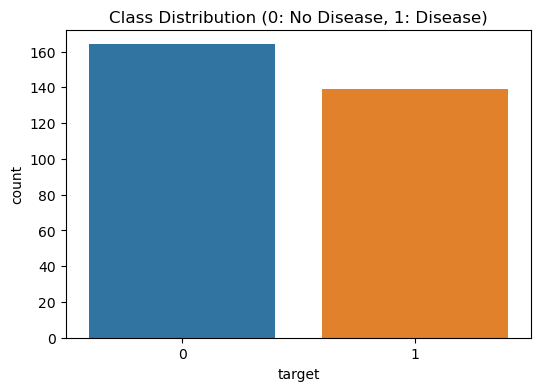


Class distribution:
 target
0    0.541254
1    0.458746
Name: proportion, dtype: float64


In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df)
plt.title('Class Distribution (0: No Disease, 1: Disease)')
plt.show()
print("\nClass distribution:\n", df['target'].value_counts(normalize=True))

# Exploratory Data Analysis (EDA)

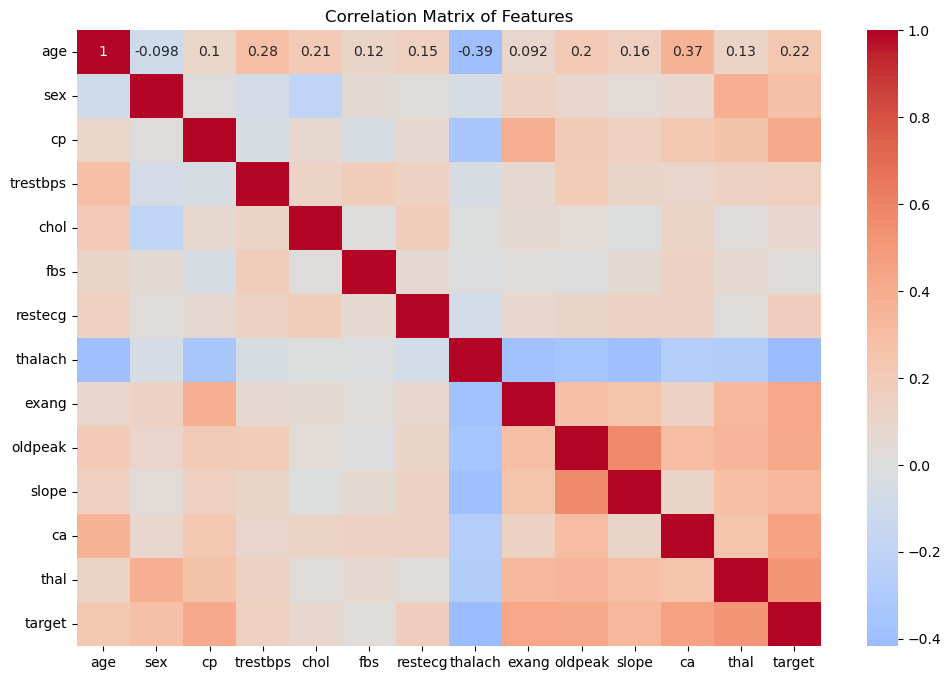

In [15]:
# Correlation matrix
plt.figure(figsize=(12,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.show()

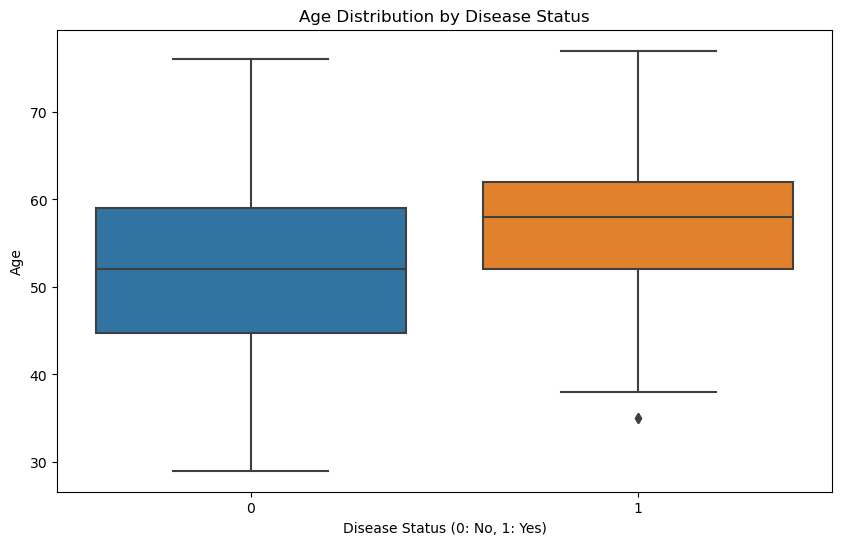

In [17]:
# Age distribution by disease status
plt.figure(figsize=(10,6))
sns.boxplot(x='target', y='age', data=df)
plt.title('Age Distribution by Disease Status')
plt.xlabel('Disease Status (0: No, 1: Yes)')
plt.ylabel('Age')
plt.show()

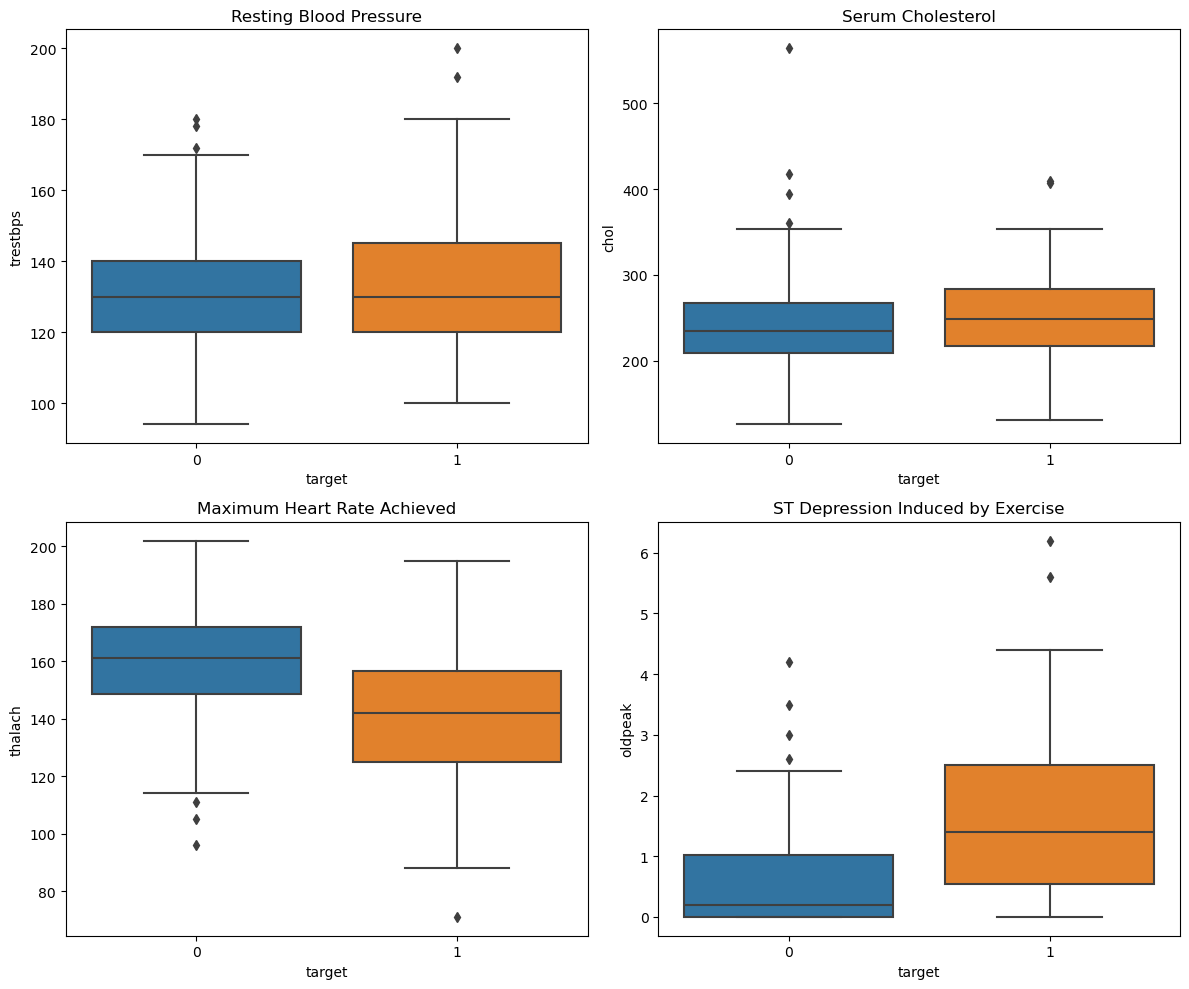

In [19]:
# Distribution of key features
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.boxplot(x='target', y='trestbps', data=df, ax=axes[0,0])
axes[0,0].set_title('Resting Blood Pressure')
sns.boxplot(x='target', y='chol', data=df, ax=axes[0,1])
axes[0,1].set_title('Serum Cholesterol')
sns.boxplot(x='target', y='thalach', data=df, ax=axes[1,0])
axes[1,0].set_title('Maximum Heart Rate Achieved')
sns.boxplot(x='target', y='oldpeak', data=df, ax=axes[1,1])
axes[1,1].set_title('ST Depression Induced by Exercise')
plt.tight_layout()
plt.show()

# Feature Engineering

In [22]:
# Create age categories
df['age_cat'] = pd.cut(df['age'], bins=[20,40,50,60,70,80], 
                      labels=['20-40', '40-50', '50-60', '60-70', '70-80'])

In [24]:
# Create cholesterol categories
df['chol_cat'] = pd.cut(df['chol'], bins=[0,200,239,500], 
                       labels=['Normal', 'Borderline High', 'High'])

In [26]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal', 'age_cat', 'chol_cat'], drop_first=True)

In [28]:
# Drop original columns that were encoded
df.drop(['age', 'chol'], axis=1, inplace=True)

In [42]:
df.shape

(303, 23)

In [44]:
print(df.head())

   sex  trestbps  fbs  thalach  exang  oldpeak   ca  target  cp_2.0  cp_3.0  \
0  1.0     145.0  1.0    150.0    0.0      2.3  0.0       0   False   False   
1  1.0     160.0  0.0    108.0    1.0      1.5  3.0       1   False   False   
2  1.0     120.0  0.0    129.0    1.0      2.6  2.0       1   False   False   
3  1.0     130.0  0.0    187.0    0.0      3.5  0.0       0   False    True   
4  0.0     130.0  0.0    172.0    0.0      1.4  0.0       0    True   False   

   ...  slope_2.0  slope_3.0  thal_6.0  thal_7.0  age_cat_40-50  \
0  ...      False       True      True     False          False   
1  ...       True      False     False     False          False   
2  ...       True      False     False      True          False   
3  ...      False       True     False     False          False   
4  ...      False      False     False     False           True   

   age_cat_50-60  age_cat_60-70  age_cat_70-80  chol_cat_Borderline High  \
0          False           True          False

In [46]:
print(df.info())
print("\nDescriptive statistics:")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sex                       303 non-null    float64
 1   trestbps                  303 non-null    float64
 2   fbs                       303 non-null    float64
 3   thalach                   303 non-null    float64
 4   exang                     303 non-null    float64
 5   oldpeak                   303 non-null    float64
 6   ca                        303 non-null    float64
 7   target                    303 non-null    int64  
 8   cp_2.0                    303 non-null    bool   
 9   cp_3.0                    303 non-null    bool   
 10  cp_4.0                    303 non-null    bool   
 11  restecg_1.0               303 non-null    bool   
 12  restecg_2.0               303 non-null    bool   
 13  slope_2.0                 303 non-null    bool   
 14  slope_3.0 

In [48]:
# Split into features and target
X = df.drop('target', axis=1)
y = df['target']

In [55]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [57]:
# Standardize numerical features
scaler = StandardScaler()
num_cols = ['trestbps', 'thalach', 'oldpeak', 'ca']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [59]:
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (212, 22)
Test set shape: (91, 22)


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [63]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True)
}

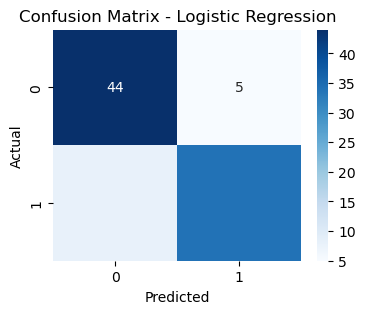


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87        49
           1       0.87      0.81      0.84        42

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.86        91
weighted avg       0.86      0.86      0.86        91



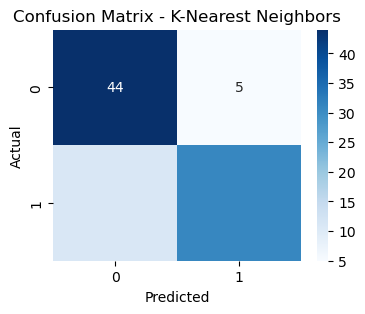


Classification Report - K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        49
           1       0.86      0.74      0.79        42

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



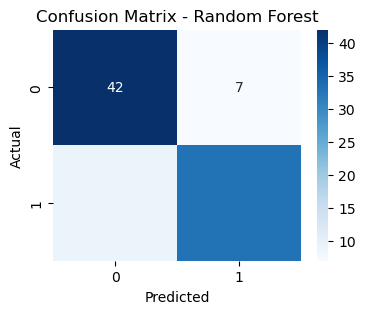


Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        49
           1       0.82      0.79      0.80        42

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



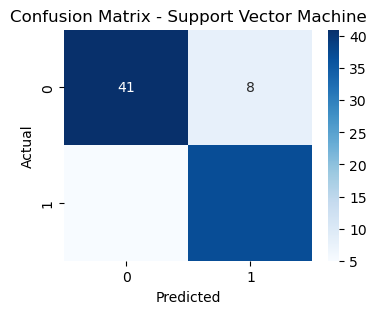


Classification Report - Support Vector Machine:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        49
           1       0.82      0.88      0.85        42

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



In [67]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    print(f"\nClassification Report - {name}:")
    print(classification_report(y_test, y_pred))

In [69]:
# Compare model performance
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df)


Model Performance Comparison:
                        Accuracy  Precision    Recall  F1 Score   ROC AUC
Logistic Regression     0.857143   0.871795  0.809524  0.839506  0.931487
K-Nearest Neighbors     0.824176   0.861111  0.738095  0.794872  0.888970
Random Forest           0.824176   0.825000  0.785714  0.804878  0.925413
Support Vector Machine  0.857143   0.822222  0.880952  0.850575  0.929057


<Figure size 1200x600 with 0 Axes>

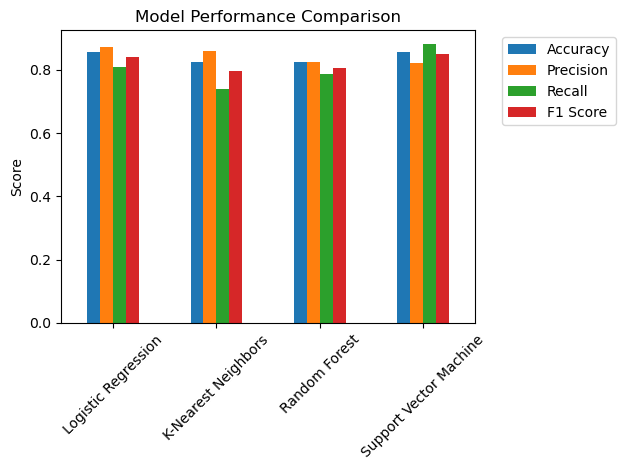

In [71]:
# Visualize model comparison
plt.figure(figsize=(12,6))
results_df.plot(kind='bar', y=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Feature Importance Analysis

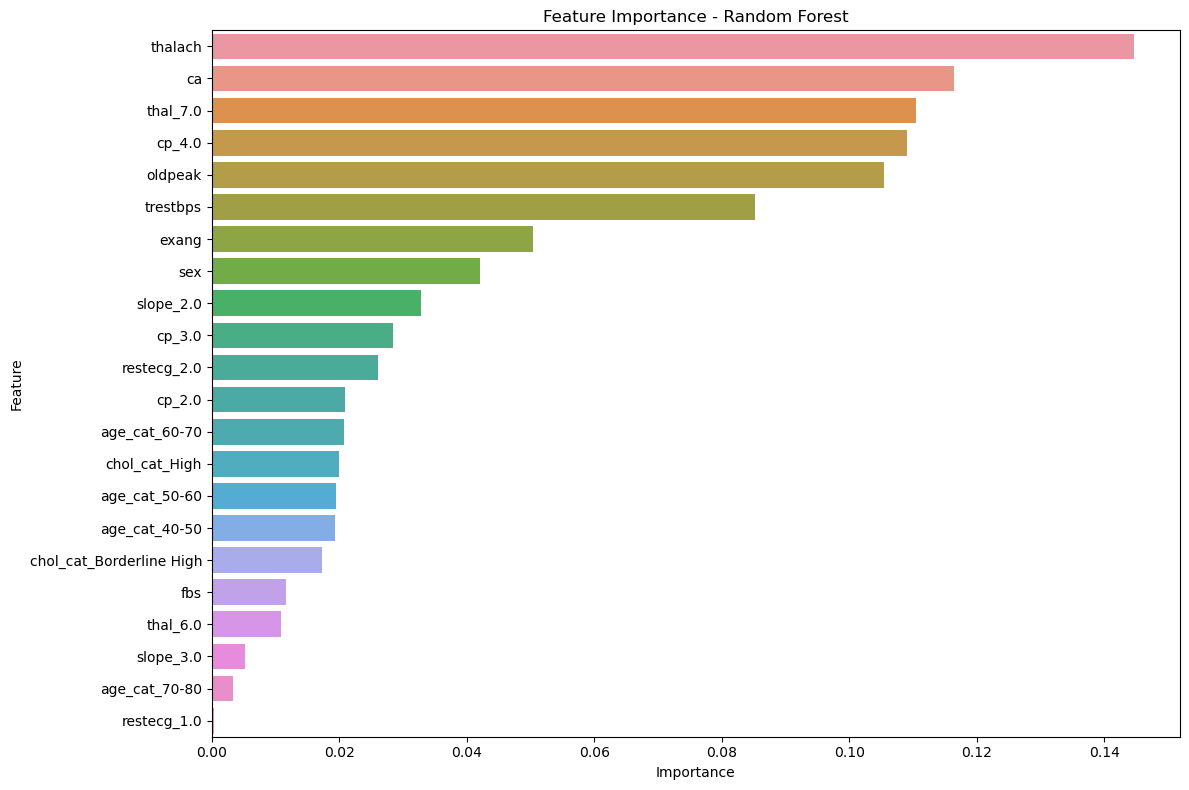

In [74]:
# Feature importance for Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

#  Cross-Validation for Robust Performance Estimates

In [77]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

In [79]:
# Initialize models (same as before)
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True)
}

In [81]:
# Set up stratified 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [83]:
# Metrics to compute
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}


In [85]:
# Perform cross-validation for each model
cv_results = {}
for name, model in models.items():
    print(f"\nPerforming 10-fold CV for {name}...")
    model_cv = {}
    
    for metric_name, metric in scoring.items():
        scores = cross_val_score(model, X_train, y_train, 
                               cv=cv, scoring=metric, n_jobs=-1)
        model_cv[metric_name] = {
            'mean': np.mean(scores),
            'std': np.std(scores),
            'scores': scores
        }
    
    cv_results[name] = model_cv


Performing 10-fold CV for Logistic Regression...

Performing 10-fold CV for K-Nearest Neighbors...

Performing 10-fold CV for Random Forest...

Performing 10-fold CV for Support Vector Machine...


In [87]:
# Display cross-validation results
print("\nCross-Validation Results:")
for model_name, metrics in cv_results.items():
    print(f"\n{model_name}:")
    for metric_name, values in metrics.items():
        print(f"{metric_name}: {values['mean']:.3f} ± {values['std']:.3f}")


Cross-Validation Results:

Logistic Regression:
accuracy: 0.806 ± 0.062
precision: 0.840 ± 0.121
recall: 0.753 ± 0.112
f1: 0.781 ± 0.061
roc_auc: 0.891 ± 0.047

K-Nearest Neighbors:
accuracy: 0.816 ± 0.089
precision: 0.815 ± 0.109
recall: 0.783 ± 0.124
f1: 0.795 ± 0.099
roc_auc: 0.869 ± 0.089

Random Forest:
accuracy: 0.825 ± 0.053
precision: 0.842 ± 0.094
recall: 0.753 ± 0.089
f1: 0.799 ± 0.072
roc_auc: 0.886 ± 0.054

Support Vector Machine:
accuracy: 0.835 ± 0.056
precision: 0.863 ± 0.081
recall: 0.774 ± 0.123
f1: 0.809 ± 0.070
roc_auc: 0.899 ± 0.068


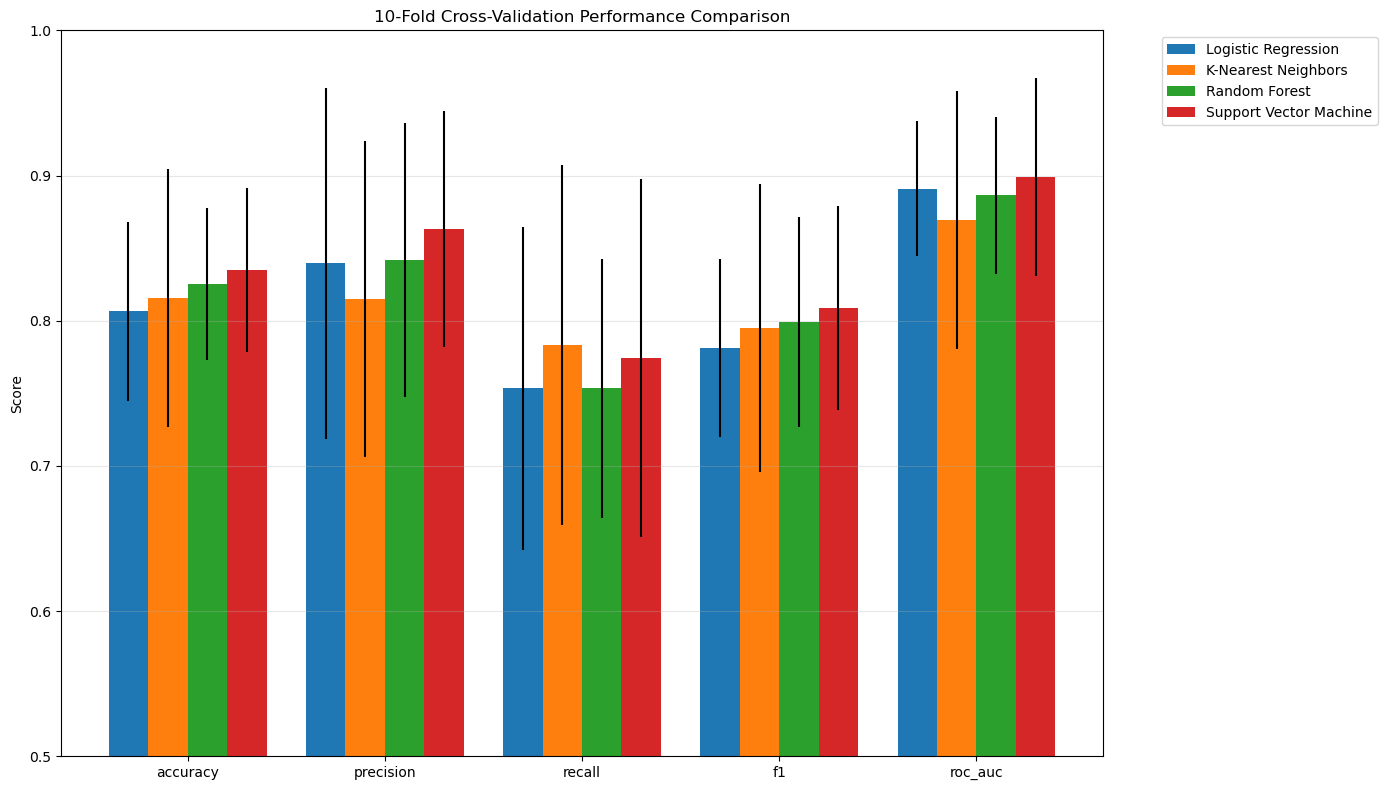

In [89]:
# Visualize CV results
plt.figure(figsize=(14, 8))
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
positions = np.arange(len(metrics))
width = 0.2

for i, (model_name, model_metrics) in enumerate(cv_results.items()):
    means = [model_metrics[m]['mean'] for m in metrics]
    stds = [model_metrics[m]['std'] for m in metrics]
    plt.bar(positions + i*width, means, width, 
            yerr=stds, label=model_name)

plt.xticks(positions + width*1.5, metrics)
plt.ylabel('Score')
plt.title('10-Fold Cross-Validation Performance Comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0.5, 1.0)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()